In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

# Automatically get the filename
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Preview first few rows
df.head()


Saving heart_disease_uci 2.csv to heart_disease_uci 2.csv


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
# Convert 'num' to binary target: 1 = heart disease, 0 = no heart disease
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
# Drop high-missing columns and redundant ones
df.drop(columns=['id', 'dataset', 'num', 'ca', 'thal'], inplace=True)

In [ ]:
# Fill numeric columns with median
num_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
cat_cols = ['fbs', 'restecg', 'exang', 'slope']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-4-6d34c9e9c06f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-4-6d34c9e9c06f>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [ ]:
from sklearn.preprocessing import StandardScaler

# One-hot encode categorical variables
cat_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']
df_encoded = pd.get_dummies(df, columns=cat_vars, drop_first=True)

# Normalize numerical features
scale_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
df_encoded[scale_cols] = scaler.fit_transform(df_encoded[scale_cols])

# Confirm data is ready
df_encoded.head()


,age,trestbps,chol,thalch,oldpeak,target,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping
0,1.007386,0.705176,0.303643,0.489727,1.368109,0,True,False,False,True,True,False,False,False,False,False
1,1.432034,1.518569,0.789967,-1.181478,0.611589,1,True,False,False,False,False,False,False,True,True,False
2,1.432034,-0.650479,0.266939,-0.345875,1.651804,1,True,False,False,False,False,False,False,True,True,False
3,-1.752828,-0.108217,0.459634,1.961979,2.502889,0,True,False,True,False,False,True,False,False,False,False
4,-1.328180,-0.108217,0.037541,1.365120,0.517024,0,False,True,False,False,False,False,False,False,False,True


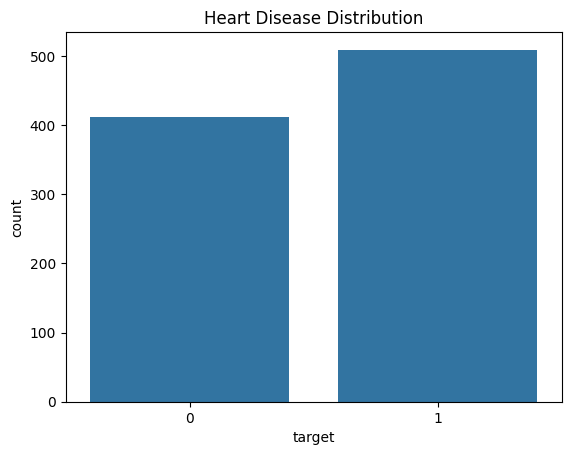

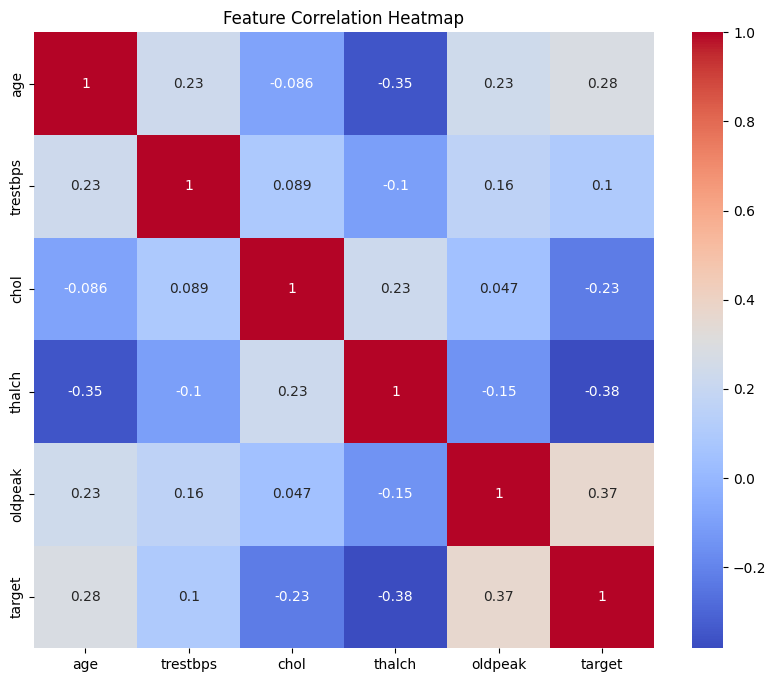

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Distribution of target variable
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.show()

# 2. Correlation heatmap (numeric columns only)
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


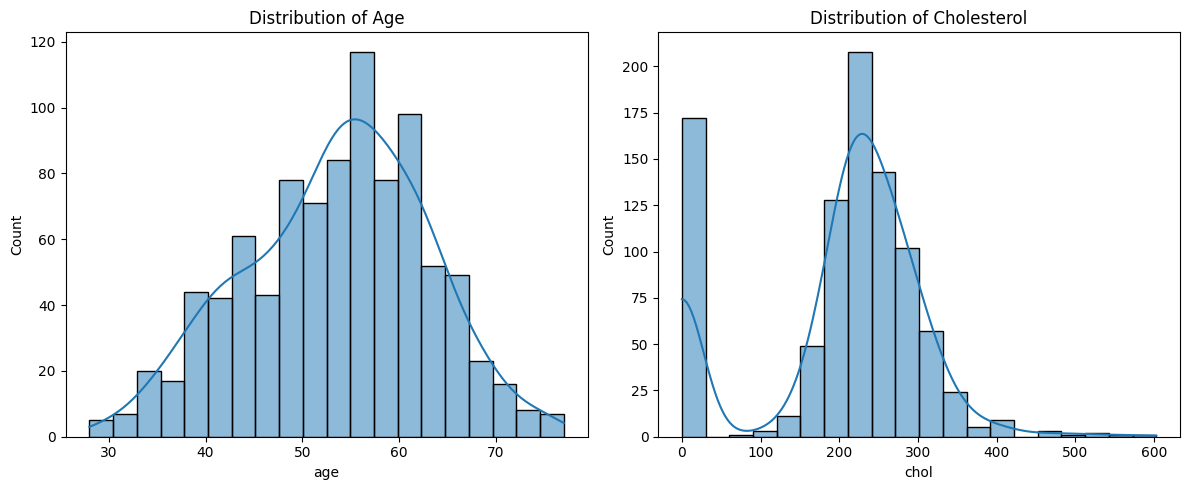

In [ ]:
# 3. Histogram of Age and Cholesterol
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='chol', bins=20, kde=True)
plt.title('Distribution of Cholesterol')

plt.tight_layout()
plt.show()


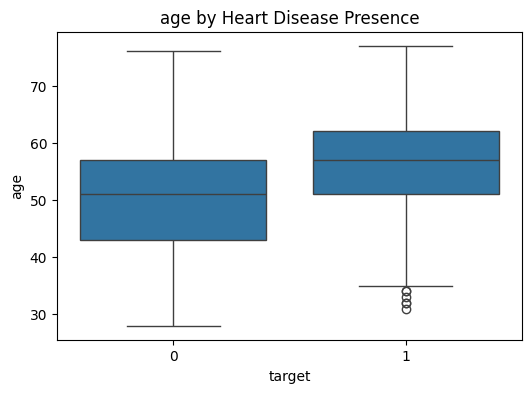

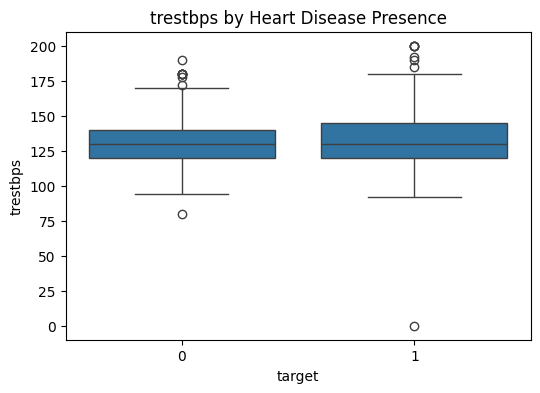

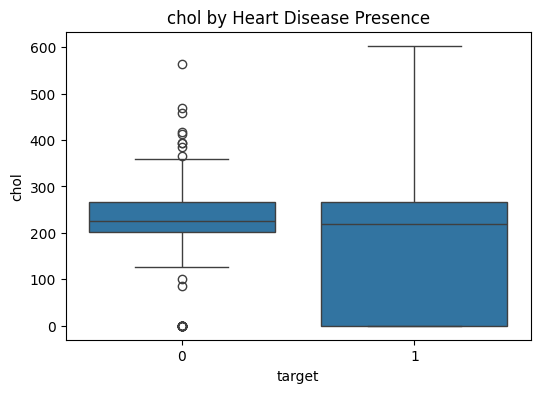

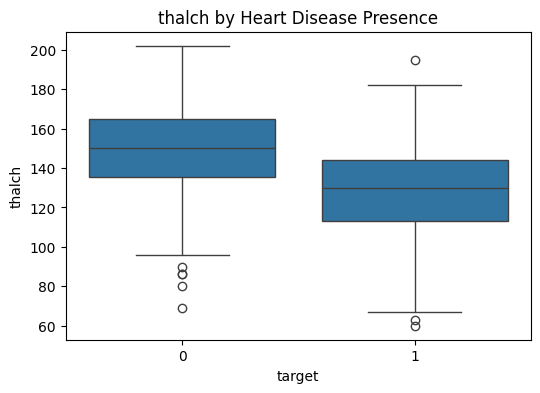

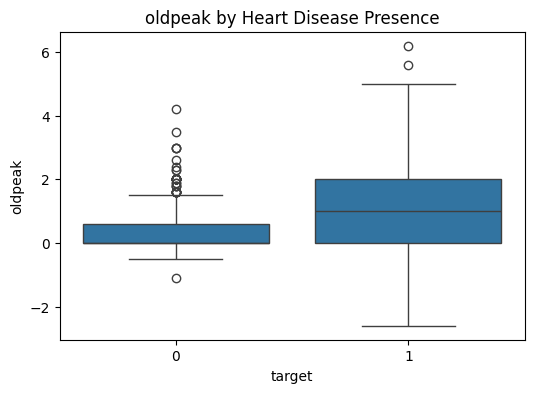

In [ ]:
# 4. Boxplots of Numeric Features by Target
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} by Heart Disease Presence')
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['target'])
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize models
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_leaf=5,
    random_state=42
)

# Train models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)


In [ ]:
# Predictions on Train Set
y_train_pred_lr = lr.predict(X_train)
y_train_pred_rf = rf.predict(X_train)

from sklearn.metrics import classification_report, roc_auc_score

print("📘 Logistic Regression - Training Set")
print(classification_report(y_train, y_train_pred_lr))
print("Train AUC (LR):", roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1]))

print("\n📘 Random Forest - Training Set")
print(classification_report(y_train, y_train_pred_rf))
print("Train AUC (RF):", roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1]))

📘 Logistic Regression - Training Set
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       336
           1       0.82      0.85      0.83       400

    accuracy                           0.82       736
   macro avg       0.81      0.81      0.81       736
weighted avg       0.82      0.82      0.81       736

Train AUC (LR): 0.8915252976190475

📘 Random Forest - Training Set
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       336
           1       0.85      0.87      0.86       400

    accuracy                           0.84       736
   macro avg       0.84      0.84      0.84       736
weighted avg       0.84      0.84      0.84       736

Train AUC (RF): 0.9206436011904762


In [ ]:
# Test set evaluation
print("\n📌 Logistic Regression - Test Set")
print(classification_report(y_test, y_pred_lr))
print("Test AUC (LR):", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

print("\n📌 Random Forest - Test Set")
print(classification_report(y_test, y_pred_rf))
print("Test AUC (RF):", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))



📌 Logistic Regression - Test Set
              precision    recall  f1-score   support

           0       0.74      0.77      0.76        75
           1       0.84      0.82      0.83       109

    accuracy                           0.80       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.80      0.80       184

Test AUC (LR): 0.88782874617737

📌 Random Forest - Test Set
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        75
           1       0.89      0.89      0.89       109

    accuracy                           0.87       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184

Test AUC (RF): 0.899204892966361


In [ ]:
from sklearn.metrics import accuracy_score

# Compute Error Rate (1 - accuracy)
error_lr = 1 - accuracy_score(y_test, y_pred_lr)
error_rf = 1 - accuracy_score(y_test, y_pred_rf)

print("\n❌ Error / Loss Metrics:")
print(f"Logistic Regression Error Rate: {round(error_lr, 4)}")
print(f"Random Forest Error Rate: {round(error_rf, 4)}")



❌ Error / Loss Metrics:
Logistic Regression Error Rate: 0.2011
Random Forest Error Rate: 0.1304


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.76        75
           1       0.84      0.82      0.83       109

    accuracy                           0.80       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.80      0.80       184

Random Forest Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        75
           1       0.89      0.89      0.89       109

    accuracy                           0.87       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184



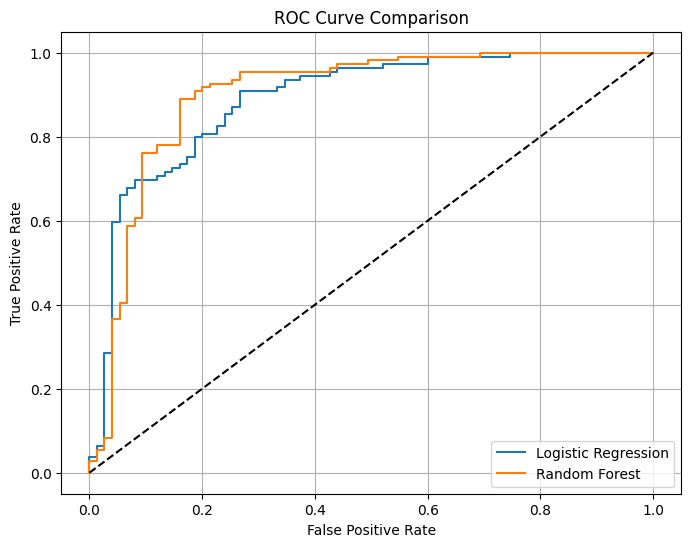

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()
